In [3]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data = data.drop('CustomerID', axis=1)

In [7]:
data.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
data = data.rename({'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spend_Percent'}, axis=1)

In [9]:
data['Gender'] = data['Gender'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         200 non-null    category
 1   Age            200 non-null    int64   
 2   Annual_Income  200 non-null    int64   
 3   Spend_Percent  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [11]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [12]:
data_cleaned = pd.get_dummies(data, columns=['Gender'], dtype=int)

In [13]:
data_cleaned

,Age,Annual_Income,Spend_Percent,Gender_1,Gender_0
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [14]:
data.iloc[:, 1:4]

,Age,Annual_Income,Spend_Percent
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:4])
scaled_data

scaled_data2 = scaler.fit_transform(data_cleaned)
scaled_data2

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

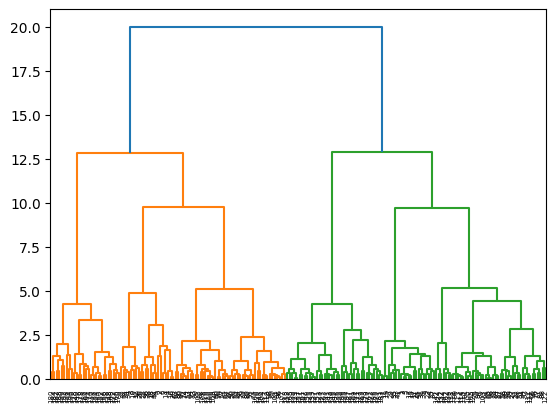

In [16]:
dg = sch.dendrogram(sch.linkage(scaled_data, method="ward"))

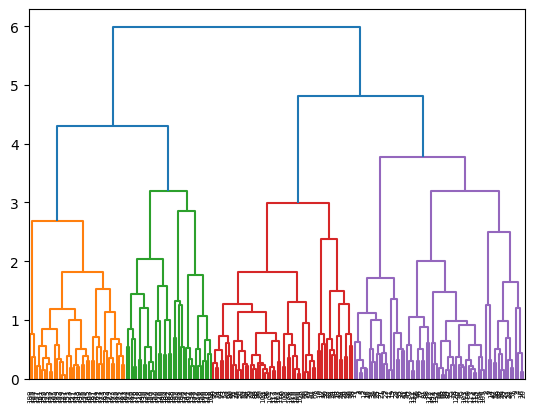

In [17]:
dg = sch.dendrogram(sch.linkage(scaled_data, method="complete"))

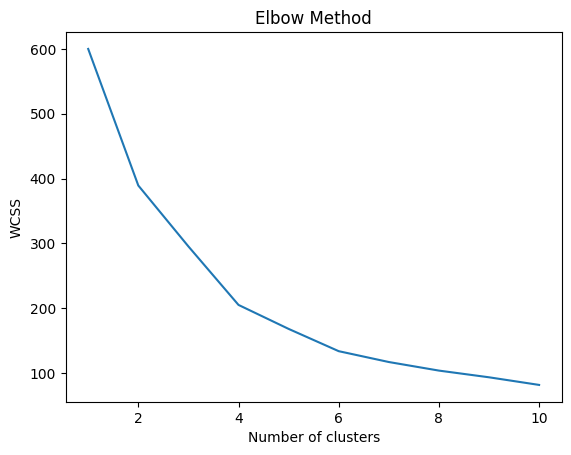

In [18]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
cluster2 = AgglomerativeClustering(2, metric='euclidean', linkage='ward')
cluster3 = AgglomerativeClustering(3, metric='euclidean', linkage='complete')
cluster4 = AgglomerativeClustering(4, metric='euclidean', linkage='ward')
cluster5 = AgglomerativeClustering(5, metric='euclidean', linkage='ward')

In [20]:
data['cluster2'] = cluster2.fit_predict(scaled_data)
data['cluster3'] = cluster3.fit_predict(scaled_data)
data['cluster4'] = cluster4.fit_predict(scaled_data)
data['cluster5'] = cluster5.fit_predict(scaled_data)

In [21]:
print(data.cluster2.value_counts())
print(data.cluster3.value_counts())
print(data.cluster4.value_counts())
print(data.cluster5.value_counts())

cluster2
0    105
1     95
Name: count, dtype: int64
cluster3
0    74
1    69
2    57
Name: count, dtype: int64
cluster4
0    67
1    66
2    39
3    28
Name: count, dtype: int64
cluster5
0    66
1    45
2    39
3    28
4    22
Name: count, dtype: int64


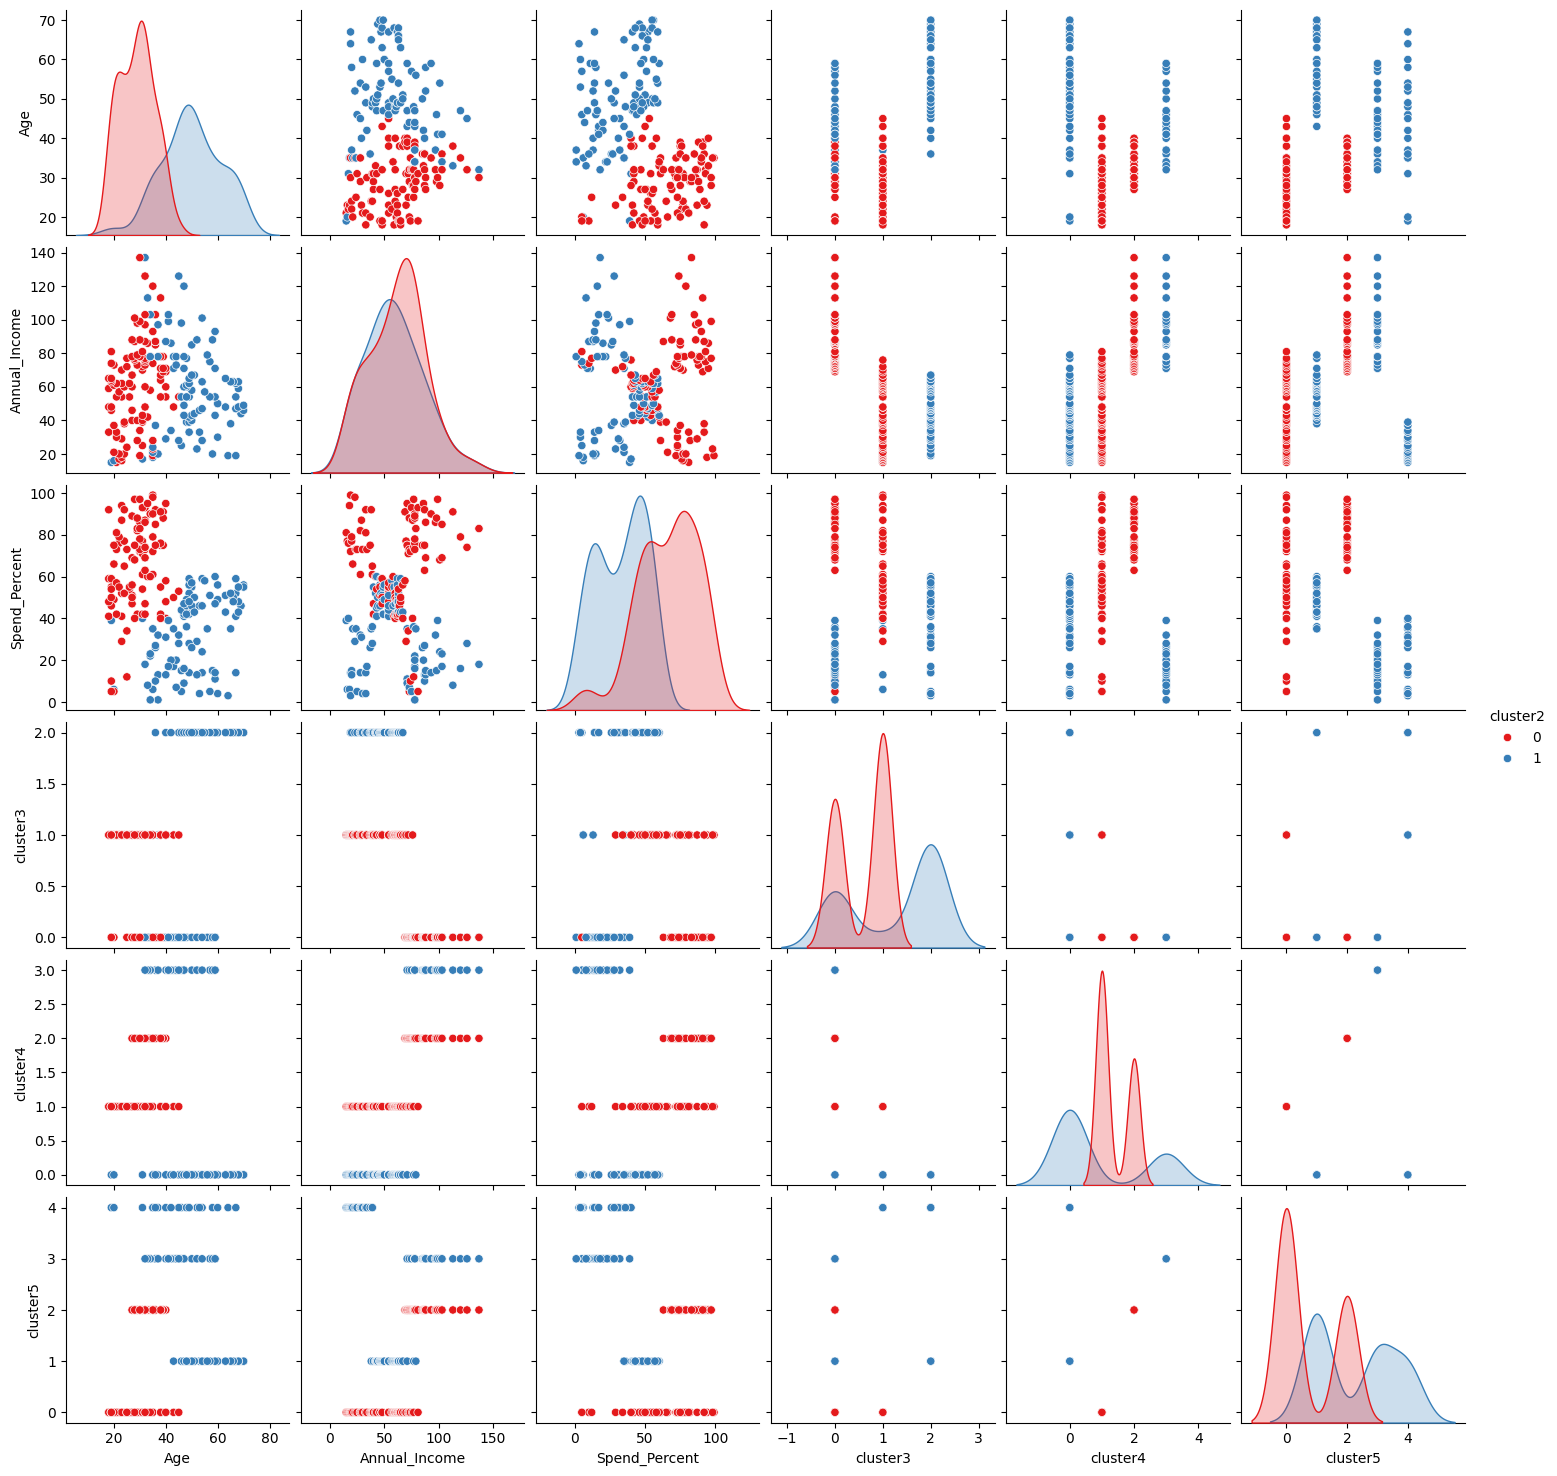

In [27]:
sn.pairplot(data, hue='cluster2', palette='Set1')
plt.show()

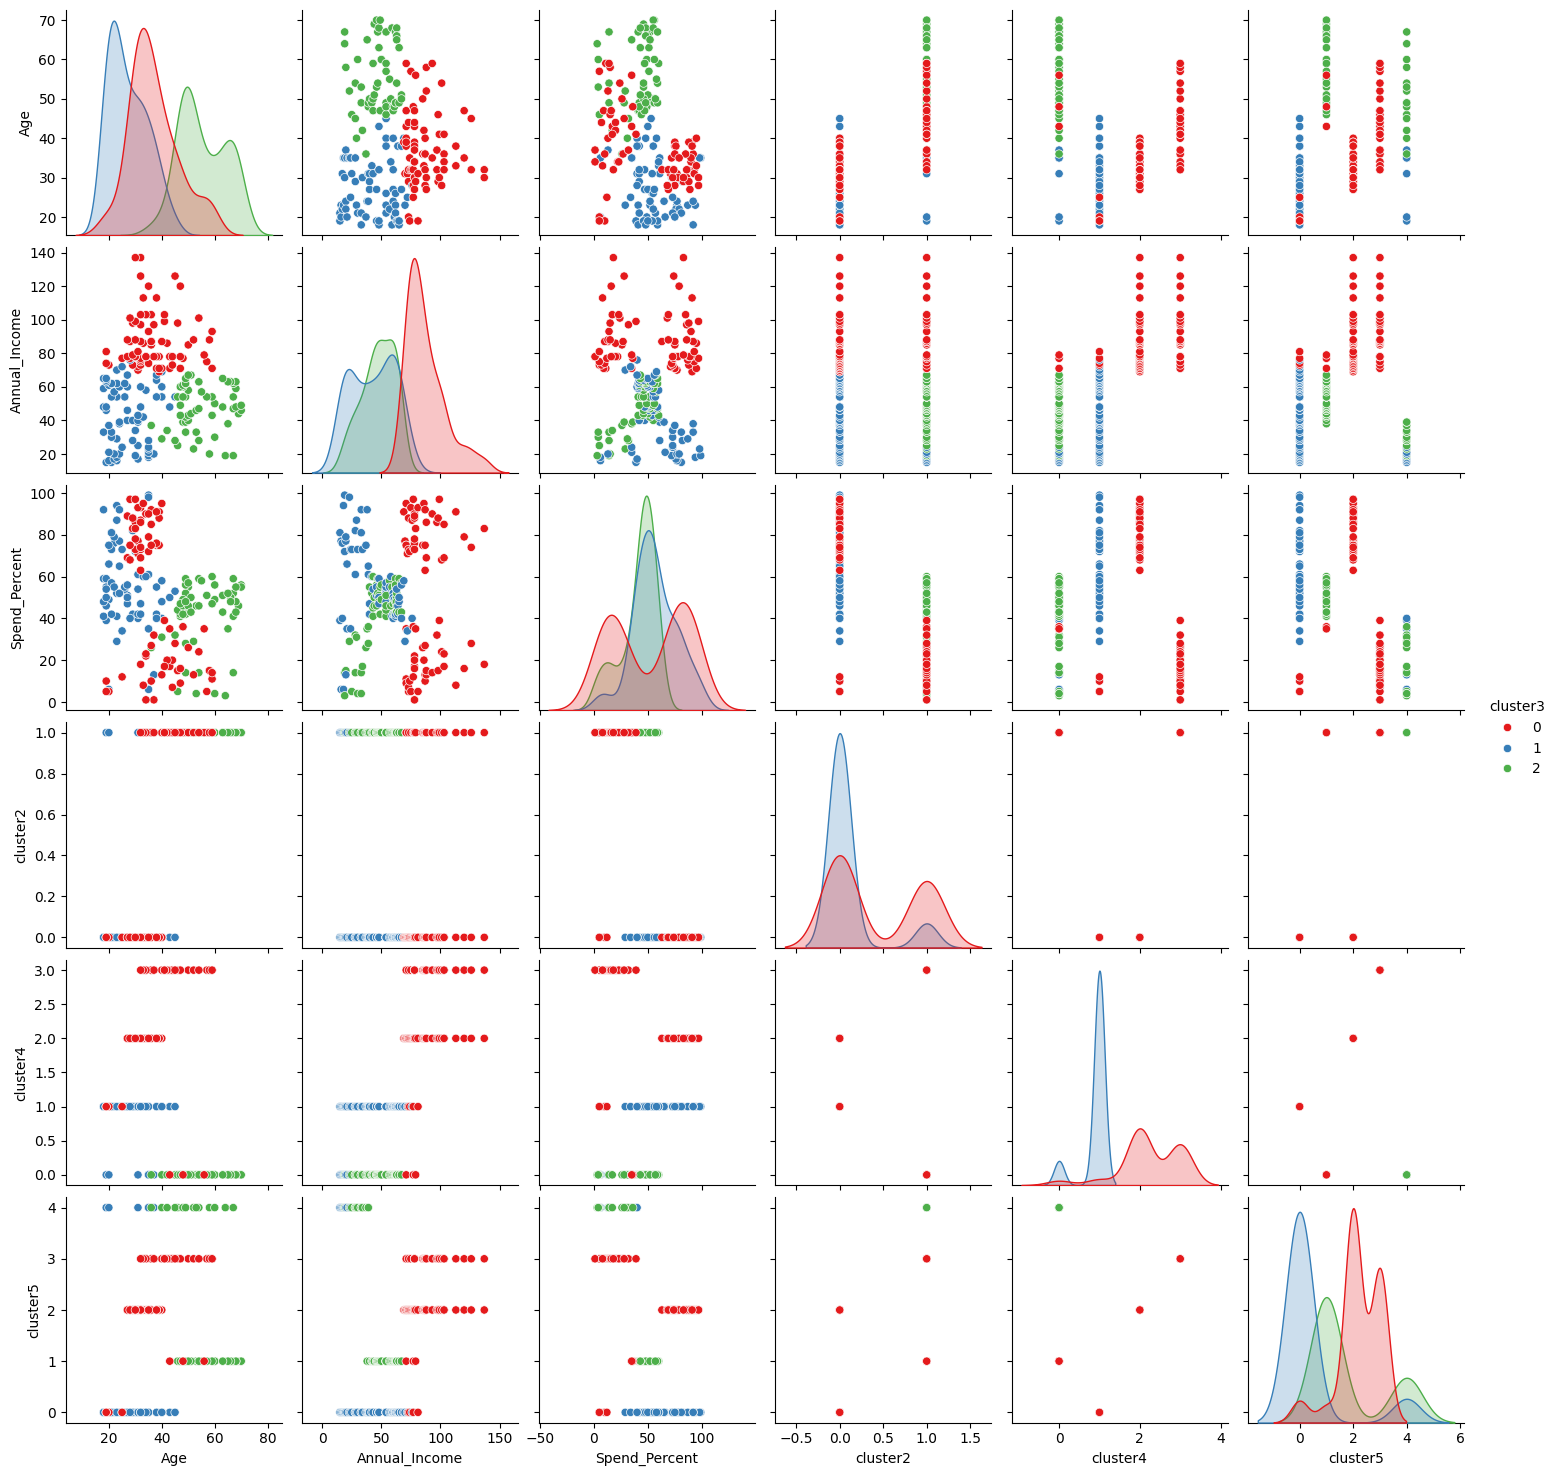

In [23]:
sn.pairplot(data, hue='cluster3', palette='Set1')
plt.show()

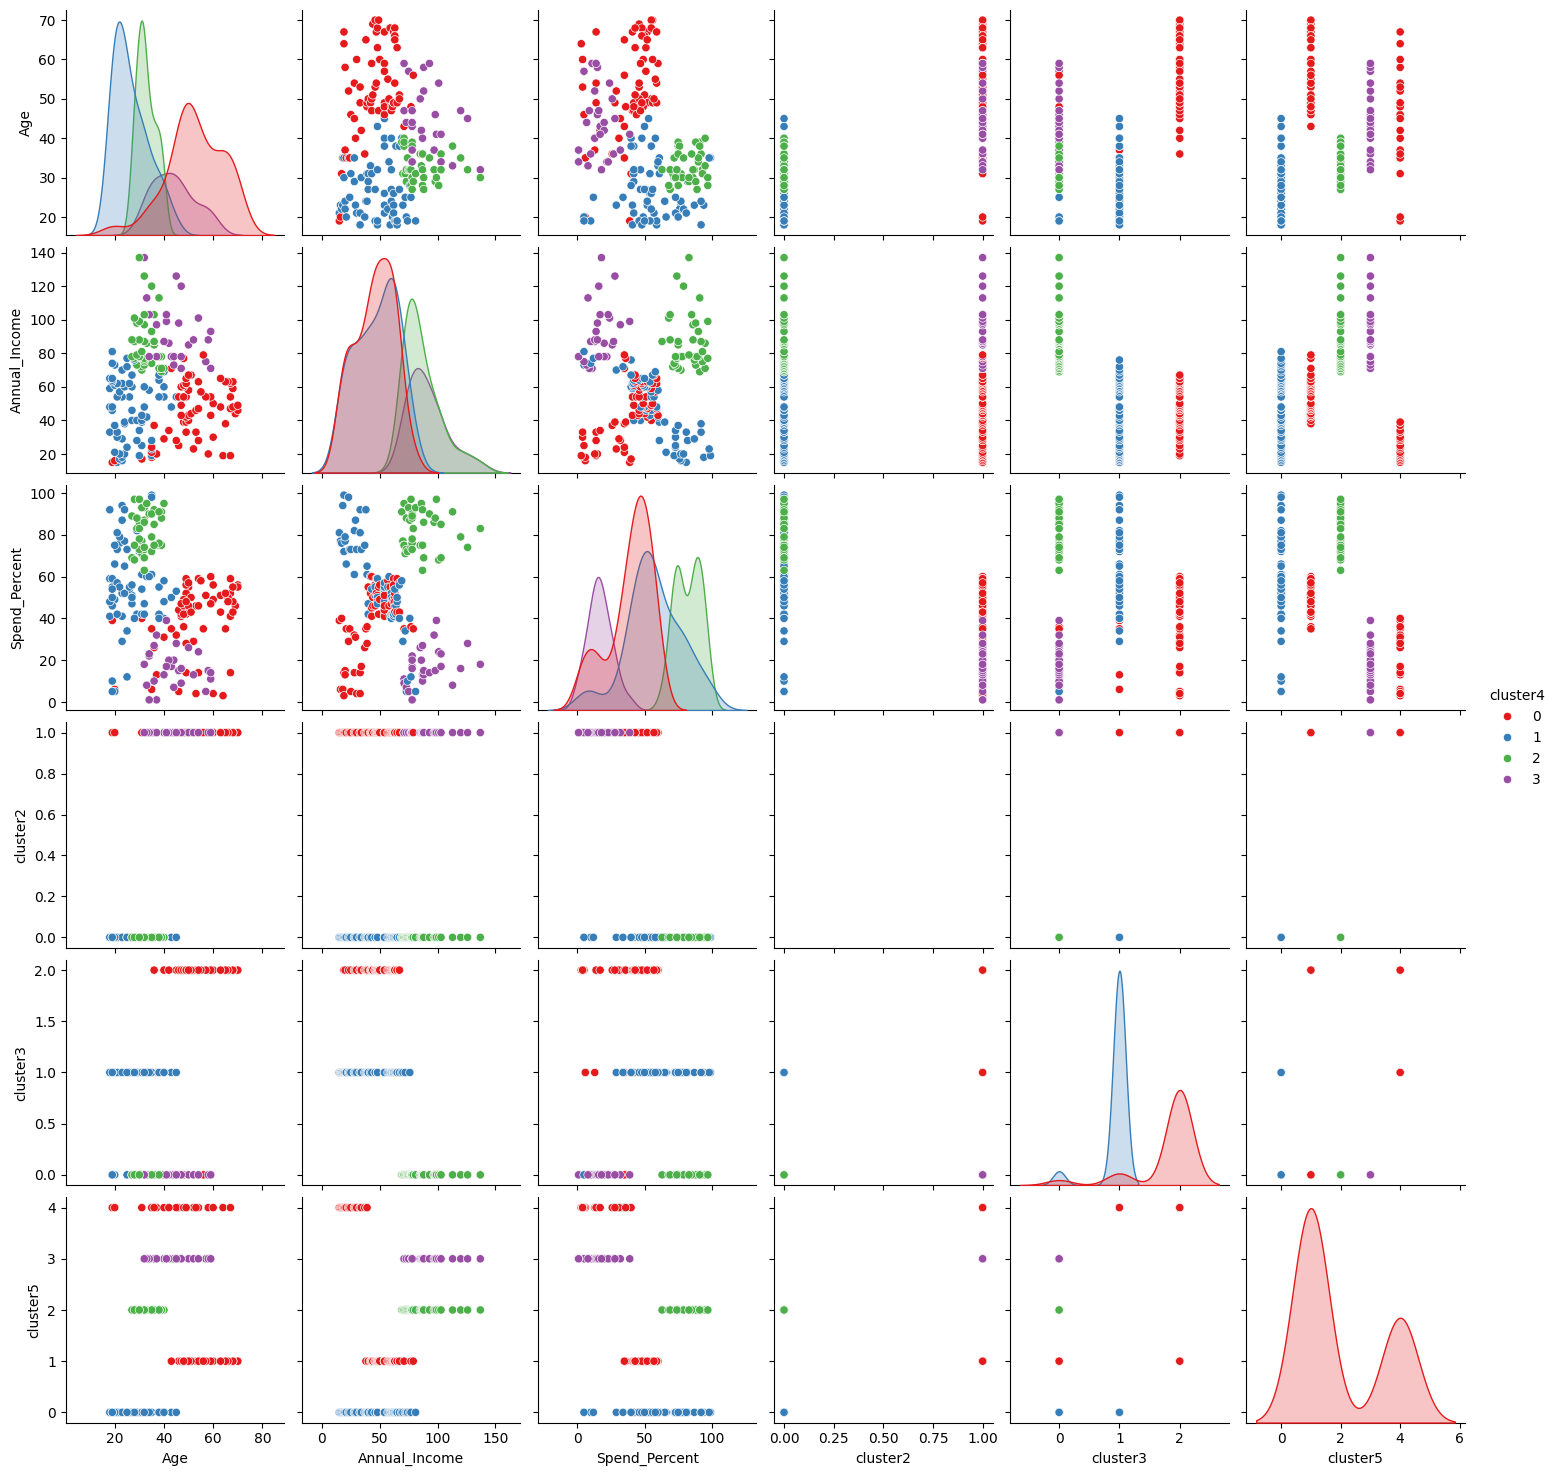

In [24]:
sn.pairplot(data, hue='cluster4', palette='Set1')
plt.show()

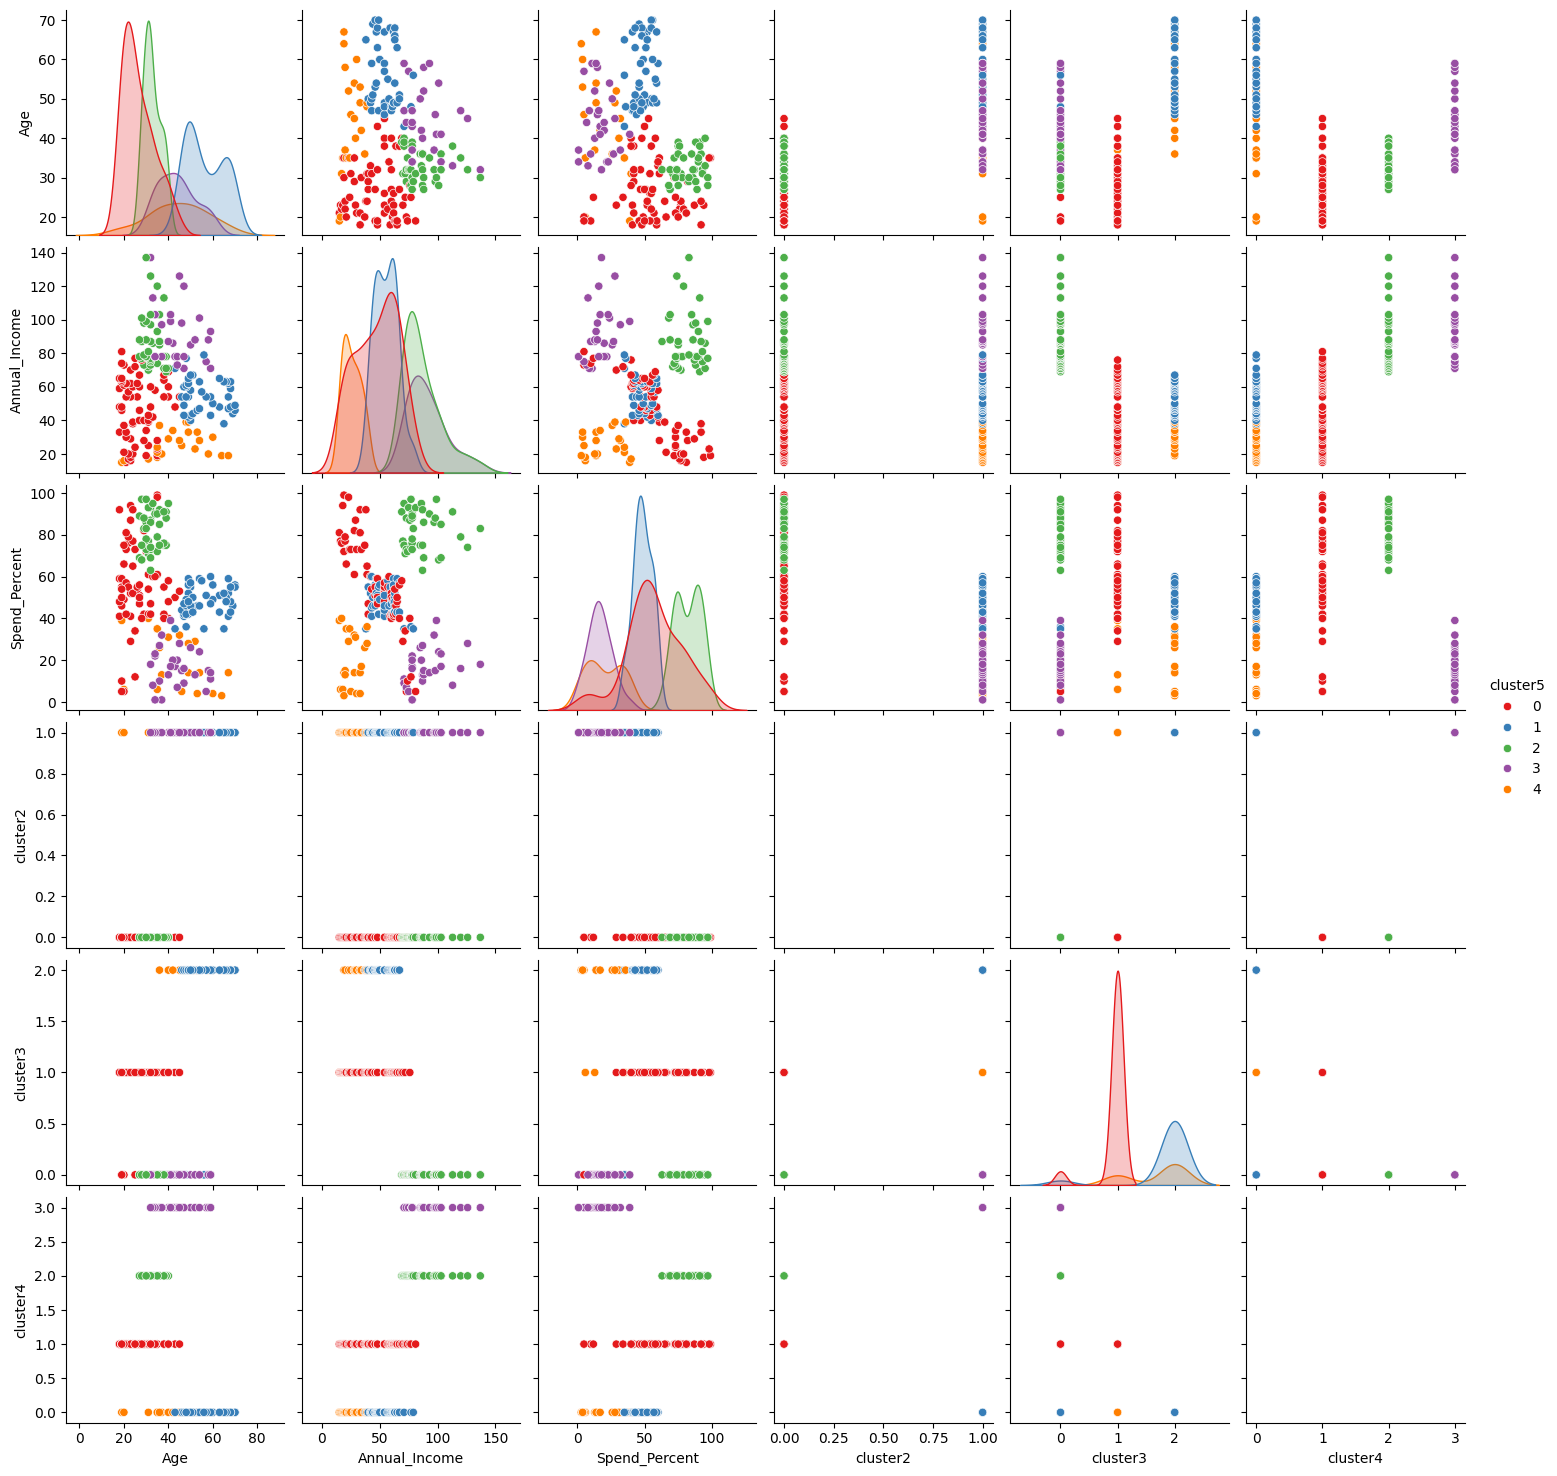

In [25]:
sn.pairplot(data, hue='cluster5', palette='Set1')
plt.show()

In [26]:
data

,Gender,Age,Annual_Income,Spend_Percent,cluster2,cluster3,cluster4,cluster5
0,0,19,15,39,1,1,0,4
1,0,21,15,81,0,1,1,0
2,1,20,16,6,1,1,0,4
3,1,23,16,77,0,1,1,0
4,1,31,17,40,1,1,0,4
...,...,...,...,...,...,...,...,...
195,1,35,120,79,0,0,2,2
196,1,45,126,28,1,0,3,3
197,0,32,126,74,0,0,2,2
198,0,32,137,18,1,0,3,3


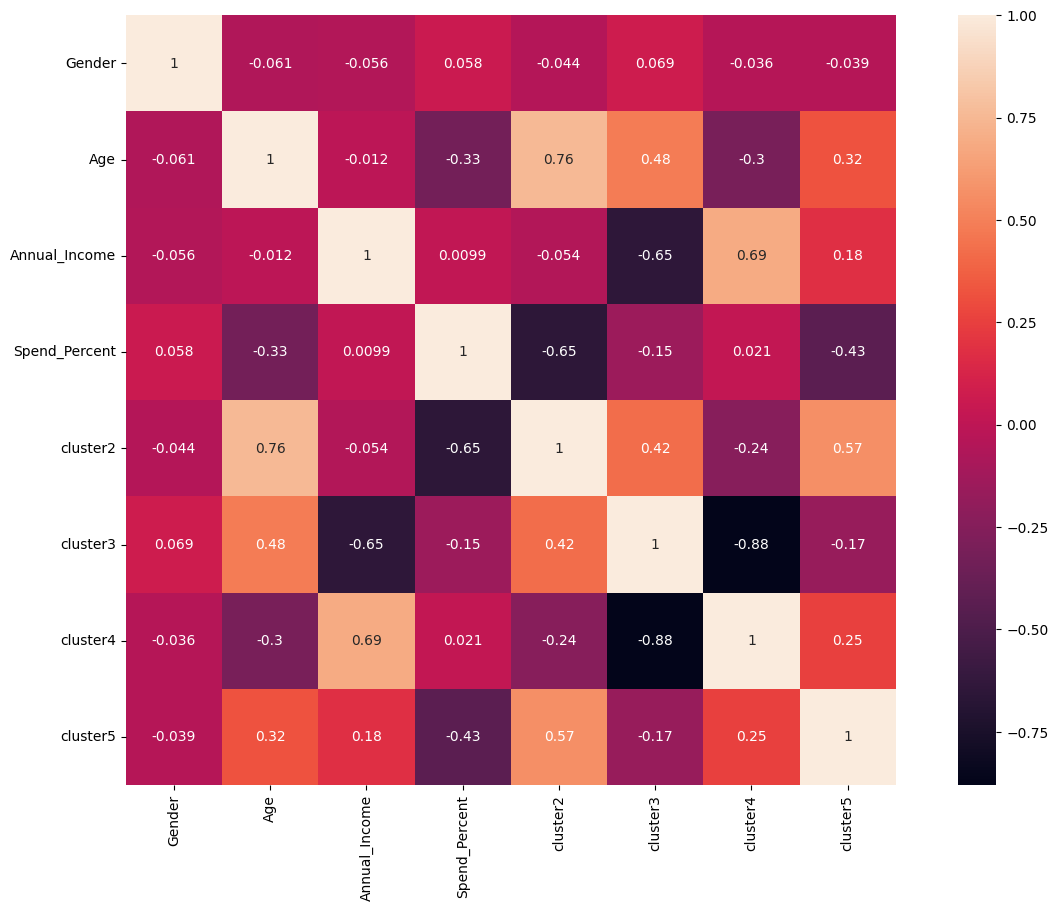

In [28]:
correlation_matrix = data.corr()
plt.subplots(figsize=(16,10))
sn.heatmap(data = correlation_matrix, annot=True, square=True)
plt.show()

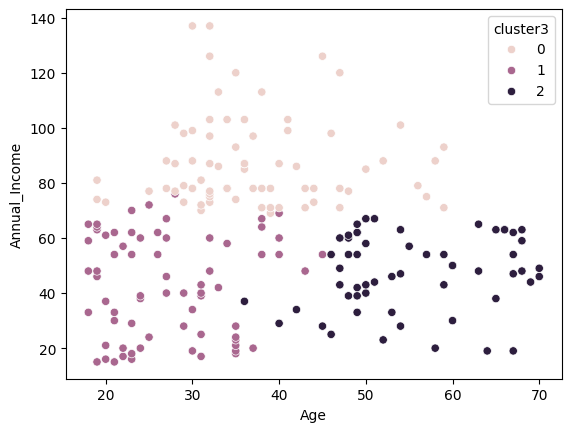

In [37]:
sn.scatterplot(x="Age",y="Annual_Income",hue="cluster3",data=data)
plt.show()

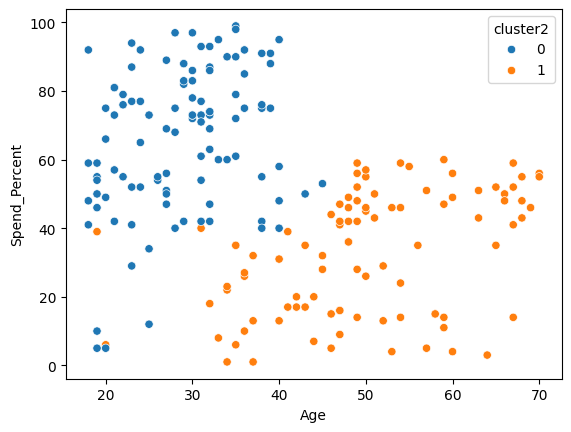

In [36]:
sn.scatterplot(x="Age",y="Spend_Percent",hue="cluster2",data=data)
plt.show()

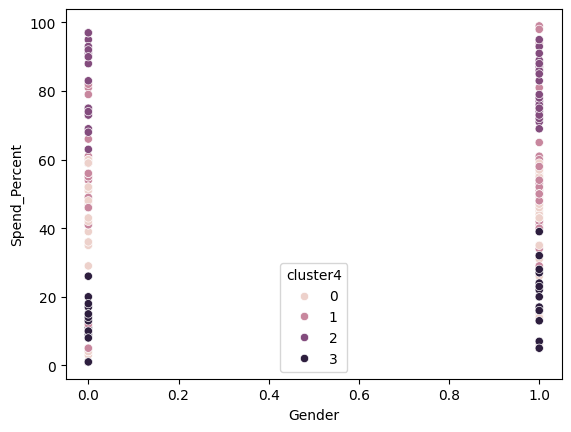

In [51]:
sn.scatterplot(x="Spend_Percent",y="Annual_Income",hue="cluster5",data=data)
plt.show()

<Axes: xlabel='Annual_Income', ylabel='Count'>

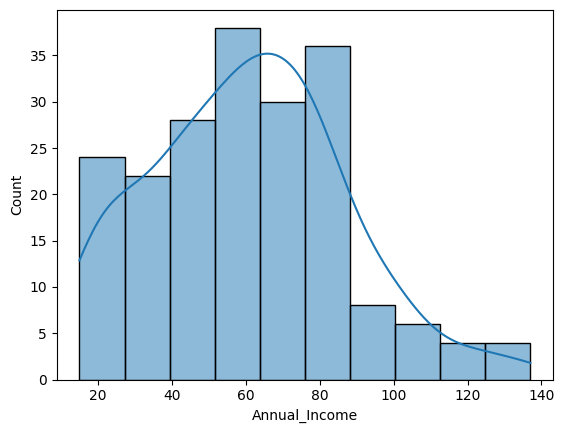

In [52]:
sn.histplot(data['Annual_Income'],bins=10,kde=True)

<Axes: xlabel='Age', ylabel='Count'>

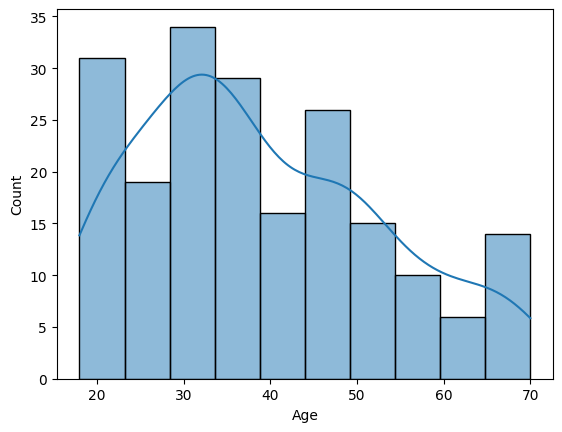

In [53]:
sn.histplot(data['Age'],bins=10,kde=True)

<Axes: xlabel='Spend_Percent', ylabel='Count'>

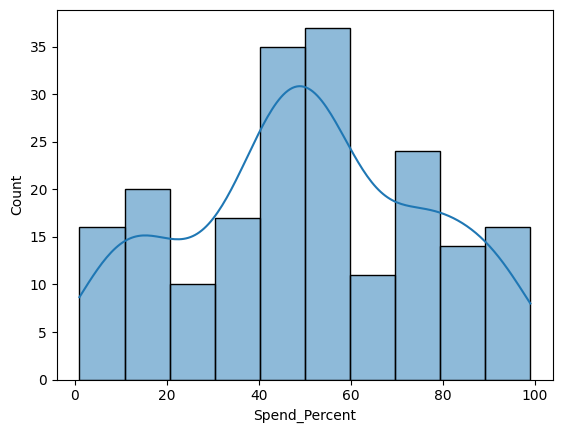

In [54]:
sn.histplot(data['Spend_Percent'],bins=10,kde=True)

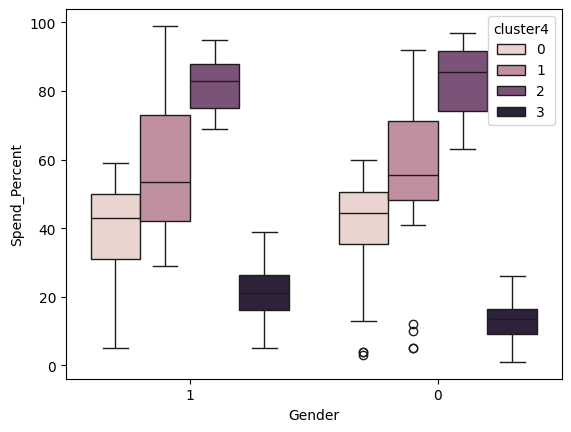

In [78]:
bar = sn.boxplot(data, x='Gender', y='Spend_Percent', hue='cluster4')
# sn.clustermap
# for p in bar.patches:
#     bar.annotate(format(p.get_height(), '.0f'),
#                    (p.get_x() + p.get_width() / 2., p.get_height()),
#                    ha = 'center', va = 'center',
#                    xytext = (0, 5),
#                    textcoords = 'offset points')

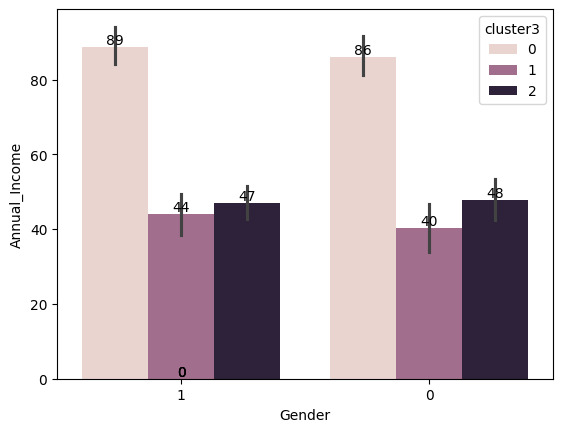

In [56]:
bar = sn.barplot(data, x='Gender', y='Annual_Income', hue='cluster3')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

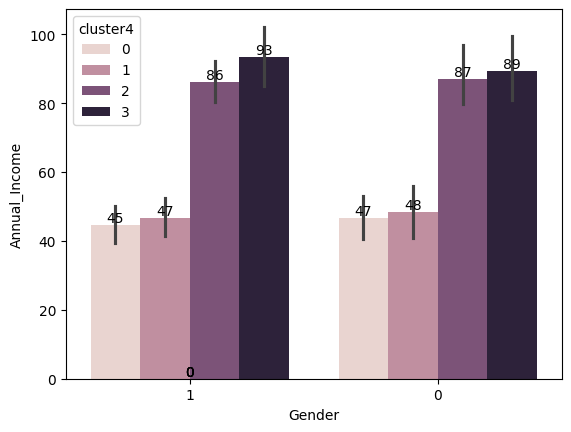

In [60]:
bar = sn.barplot(data, x='Gender', y='Annual_Income', hue='cluster4')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

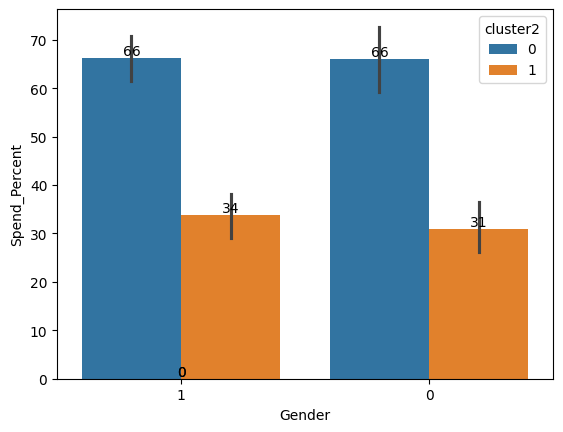

In [58]:
bar = sn.barplot(data, x='Gender', y='Spend_Percent', hue='cluster2')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

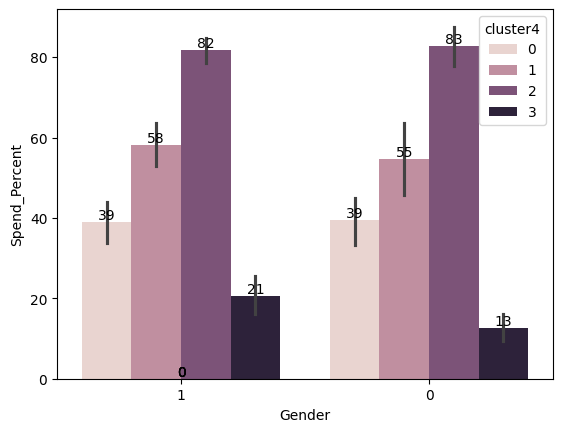

In [59]:
bar = sn.barplot(data, x='Gender', y='Spend_Percent', hue='cluster4')
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 5),
                   textcoords = 'offset points')

Summary:

1. Clustering done based on Annual income and spending score.
2. In case of 3 clusters, cluster 0 has maximum annual income, followed by cluster 2 and then cluster 1
3. Similarly in case of 4 clusters, it would be 3 > 2 > 1 > 0 for income and 2 > 1 > 0 > 3 for spend score
4. Clusters 2,3,4 all work
5. In terms of [spend score](https://colab.research.google.com/drive/1fY67FImcFD8c0La8Avt-lok73K8WgXCE#scrollTo=SsPSVRZWjPLu&line=1&uniqifier=1), females have more overall score than males